# Regresión lineal simple y modelos de regresión

## ¿Qué es regresión lineal simple?

La regresión lineal simple es una forma de encontrar la relación entre dos variables: una variable independiente `x` (causa o entrada) y una variable dependiente `y` (efecto o salida).

Matemáticamente se escribe así:

y = a + b * x + e

donde:
- `a` (intercepto) es el valor de `y` cuando `x = 0` (una línea base).
- `b` (pendiente) muestra cuánto cambia `y` por cada unidad que aumenta `x`. Si `b = 2`, entonces `y` sube 2 unidades por cada +1 en `x`.
- `e` representa el error o ruido: las diferencias que no explica la línea.

En palabras simples: la regresión lineal simple ajusta una línea recta que, en promedio, pasa lo más cerca posible de los puntos (x,y).

## Modelos de regresión lineal vs no lineal

- Modelos de regresión lineal: predicen `y` usando una combinación lineal de las variables (o de transformaciones que hacen que la relación sea lineal en los parámetros). 

Ejemplos: 

`y = a + b*x` (lineal simple), 
`y = a + b1*x + b2*x^2` (polinómico) 

—aunque la curva sea curvada, el modelo es *lineal en los parámetros* (los parámetros `b` aparecen de forma lineal en la fórmula).

- Modelos de regresión no lineal: la relación entre `y` y los parámetros NO es lineal —los parámetros pueden aparecer dentro de funciones no lineales como exponenciales, logaritmos o productos complicados. 

Ejemplo:

$y = a * exp(b*x)$ o 

$y = a / (1 + exp(-b*(x-c)))$ (sigmoide)

En estos casos no basta con aplicar transformaciones simples para convertirlos en una forma lineal en los parámetros.

### Modelos de Regresión No Lineal

Son modelos que capturan relaciones más complejas que no pueden representarse con líneas rectas.

Ejemplos de fórmulas:

- Polinomial: y = b₀ + b₁x + b₂x² + b₃x³

- Exponencial: y = ae^(bx)

- Logarítmica: y = a + b·ln(x)

**¿Cuándo usarlos?**

Cuando la relación entre las variables no es lineal (ej: crecimiento poblacional, decaimiento radioactivo).

### Explicación matemática de la regresión lineal simple

La idea es encontrar `a` y `b` que hagan que la línea `y_hat = a + b*x` esté lo más cerca posible de los datos reales `(x_i, y_i)` para todos los i.

Se mide la cercanía con la suma de cuadrados de los errores: 

$$S = sum((y_i - y_hat_i)^2).$$

Minimizar S conduce a fórmulas directas para `b` y `a` (no hace falta calcularlas a mano en código, pero es útil conocerlas):

$$b = \frac{sum( (x_i - mean(x)) * (y_i - mean(y)) )}{sum( (x_i - mean(x))^2 )}$$
$$a = mean(y) - b * mean(x)$$

Interpretación sencilla:
- `b` compara cómo varían `x` e `y` juntos (covarianza) frente a la variación de `x` sola.
- `a` desplaza la línea para que pase por el centro de los datos (por los promedios).

En términos visuales: la mejor línea es aquella que minimiza la altura total (cuadrada) de las distancias verticales entre los puntos y la línea.

---

## Contraste práctico: cuándo usar cada cosa

- Si los puntos en un scatter parecen alinearse en torno a una línea recta, la regresión lineal simple probablemente funcione bien.

- Si la relación tiene curvatura pero puede describirse como un polinomio (cuadrática, cúbica...), puedes usar regresión polinómica (que sigue siendo lineal en parámetros después de transformar las columnas).

- Si la relación tiene forma exponencial, sigmoide u otra que NO se hace lineal con transformaciones simples, necesitas modelos no lineales o técnicas específicas (ajuste no lineal).

## Ejemplos de código en Python

### Ejemplo 1: Regresión lineal simple con datos sintéticos

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

np.random.seed(0)
# generamos datos: y = 2.5 + 1.7*x + ruido
x = np.linspace(0, 10, 40)
noise = np.random.normal(scale=2.0, size=x.shape)
y = 2.5 + 1.7 * x + noise

# preparamos en forma (n_samples, n_features) para sklearn
X = x.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
a_est = model.intercept_
b_est = model.coef_[0]
r2 = model.score(X, y)

print(f'Intercepto (a): {a_est:.3f}')
print(f'Pendiente (b): {b_est:.3f}')
print(f'R^2 (explicación de la varianza): {r2:.3f}')

Intercepto (a): 4.095
Pendiente (b): 1.506
R^2 (explicación de la varianza): 0.825


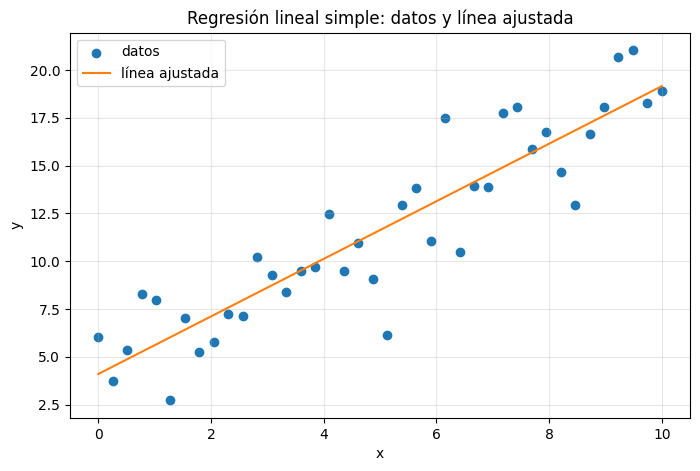

In [8]:
# Grafiquemos datos y la línea ajustada
plt.figure(figsize=(8,5))
plt.scatter(x, y, label='datos', color='tab:blue')
# línea predicha
y_hat = model.predict(X)
plt.plot(x, y_hat, color='tab:orange', label='línea ajustada')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión lineal simple: datos y línea ajustada')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Ejemplo 2: Regresión polinómica

Aunque la curva es no lineal en `x`, el modelo puede permanecer lineal en los parámetros si construimos características como `x` y `x^2`. Usaremos `PolynomialFeatures` y `LinearRegression`.

Coeficientes (para x y x^2): [ 2.12201824 -0.44248015]
Intercepto: 0.42455881137961926


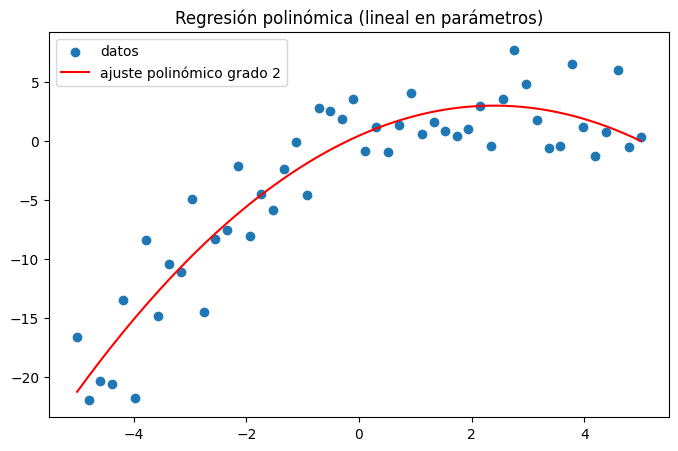

In [3]:
from sklearn.preprocessing import PolynomialFeatures
# generamos datos cuadráticos reales: y = 1.0 + 2.0*x - 0.5*x^2 + ruido
np.random.seed(1)
x2 = np.linspace(-5, 5, 50)
noise2 = np.random.normal(scale=3.0, size=x2.shape)
y2 = 1.0 + 2.0 * x2 - 0.5 * x2**2 + noise2
X2 = x2.reshape(-1,1)
poly = PolynomialFeatures(degree=2, include_bias=False)
X2_poly = poly.fit_transform(X2)  # columnas: x, x^2
model2 = LinearRegression().fit(X2_poly, y2)
print('Coeficientes (para x y x^2):', model2.coef_)
print('Intercepto:', model2.intercept_)

# gráfica
x2_grid = np.linspace(x2.min(), x2.max(), 200)
y2_pred = model2.predict(poly.transform(x2_grid.reshape(-1,1)))
plt.figure(figsize=(8,5))
plt.scatter(x2, y2, label='datos')
plt.plot(x2_grid, y2_pred, color='red', label='ajuste polinómico grado 2')
plt.title('Regresión polinómica (lineal en parámetros)')
plt.legend()
plt.show()

### Ejemplo 3: Modelo no lineal (exponencial) y transformación

Consideremos `y = A * exp(B * x)`. Si `y` es siempre positiva, podemos aplicar logaritmo: log(y) = log(A) + B * x, que es lineal en los parámetros `log(A)` y `B`. Esto es una técnica práctica pero no siempre válida (por ejemplo, si hay ceros o valores negativos).

A estimada: 1.824, B estimada: 0.825


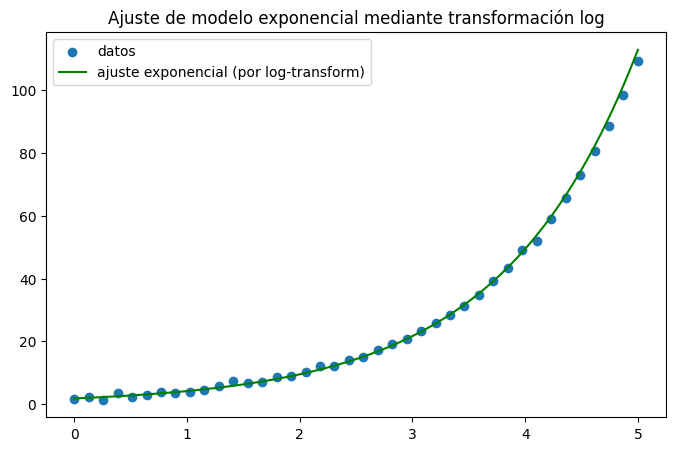

In [3]:
# Generamos datos exponenciales y ajustamos con transformada log
np.random.seed(2)
x3 = np.linspace(0, 5, 40)
A_true = 2.0
B_true = 0.8
noise3 = np.random.normal(scale=0.5, size=x3.shape)
y3 = A_true * np.exp(B_true * x3) + noise3
# aplicamos log y ajustamos regresión lineal sobre (x3, log(y3))
mask = y3 > 0
x3_pos = x3[mask]
y3_pos = y3[mask]
log_y3 = np.log(y3_pos)
model3 = LinearRegression().fit(x3_pos.reshape(-1,1), log_y3)
logA_est = model3.intercept_
B_est = model3.coef_[0]
A_est = np.exp(logA_est)
print(f'A estimada: {A_est:.3f}, B estimada: {B_est:.3f}')

# gráfica comparación
x3_grid = np.linspace(x3.min(), x3.max(), 200)
y3_pred = A_est * np.exp(B_est * x3_grid)
plt.figure(figsize=(8,5))
plt.scatter(x3, y3, label='datos')
plt.plot(x3_grid, y3_pred, color='green', label='ajuste exponencial (por log-transform)')
plt.legend()
plt.title('Ajuste de modelo exponencial mediante transformación log')
plt.show()

## Analisis de Residuales

Sea un modelo de regresión lineal:
$$ 𝑦𝑖=𝛽0+𝛽1𝑥𝑖+𝜀𝑖 $$

donde:
$$ 𝑦𝑖 $$
valor observado de la variable dependiente,
$$
𝑦^𝑖=𝛽0+𝛽1𝑥𝑖
$$

valor predicho por el modelo,

$$𝜀
𝑖
ε
i$$

valor predicho por el modelo,

$$𝜀
𝑖
ε
i$$
𝑥
𝑖
$$​

valor predicho por el modelo,

$$𝜀
𝑖
ε
i$$

: error real (no observable),

$$𝑒
𝑖 = 𝑦𝑖−𝑦^𝑖ei

=y
i
−y^
i
$$​

residual, una estimación del error real.

🔹 Objetivo principal

El propósito es verificar si el modelo de regresión cumple los supuestos estadísticos que garantizan su validez y la confiabilidad de sus estimaciones.
En particular, se analiza si los residuales se comportan como ruido aleatorio (sin patrones sistemáticos).

🔹 Supuestos clave y qué se evalúa con los residuales

Supuesto	Qué se observa en los residuales	Interpretación si se viola
Linealidad	No debe haber patrón entre 
𝑒
𝑖
e
i
	​

 y 
𝑦
^
𝑖
y
^
	​

i
	​

 o 
𝑥
𝑖
x
i
	​

.	Indica que la relación entre 
𝑥
x y 
𝑦
y no es lineal.
Independencia	Los residuales no deben estar correlacionados entre sí (especialmente en series de tiempo).	Presencia de autocorrelación (errores dependientes).
Homoscedasticidad	La varianza de los residuales debe ser constante.	Si aumenta o disminuye con 
𝑥
𝑖
x
i
	​

, hay heteroscedasticidad.
Normalidad	El histograma o gráfico Q-Q de los residuales debe parecer una distribución normal.	Afecta la validez de intervalos de confianza y pruebas t/F.
🔹 Representaciones gráficas comunes

- Gráfico de residuales vs. valores ajustados:

  - Detecta no linealidad o heteroscedasticidad.

  - Idealmente, los puntos deben dispersarse aleatoriamente alrededor de 0.

- Histograma o gráfico Q–Q:

  - Evalúa si los residuales siguen una distribución normal.

- Residuales vs. variable independiente:

  - Permite identificar patrones no lineales.

- Gráfico de residuos estandarizados:

  - Facilita detectar outliers (valores con |eᵢ| > 2σ).

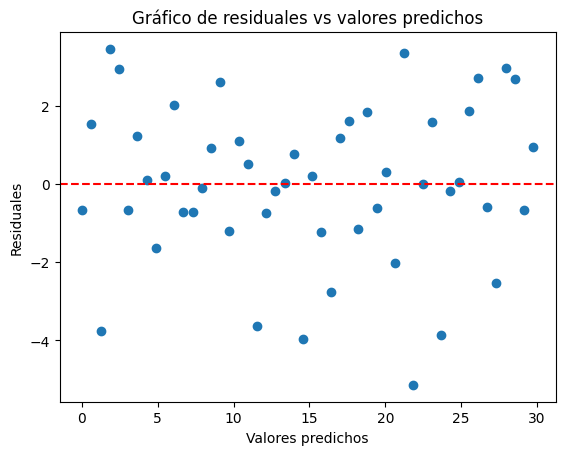

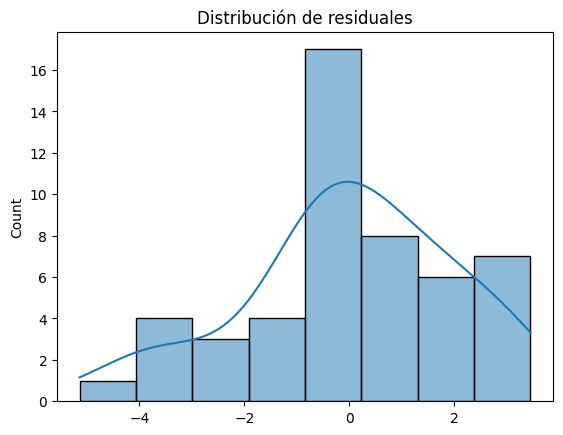

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Datos simulados
x = np.linspace(0, 10, 50)
y = 3*x + np.random.normal(0, 2, 50)  # y = 3x + ruido
X = x.reshape(-1, 1)

# Modelo
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Residuales
residuals = y - y_pred

# Gráfico de residuales
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Gráfico de residuales vs valores predichos")
plt.xlabel("Valores predichos")
plt.ylabel("Residuales")
plt.show()

# Histograma
sns.histplot(residuals, kde=True)
plt.title("Distribución de residuales")
plt.show()


🔹 Interpretación típica

- Si los puntos del gráfico de residuales están distribuidos aleatoriamente alrededor de 0 → **modelo adecuado**.

- Si aparecen patrones (curvas, embudos, tendencias) → **problemas de linealidad o heteroscedasticidad**.

- Si hay valores muy extremos → **posibles outliers o puntos influyentes**.

## Métricas de evaluación de regresiones
Para evaluar qué tan bien un modelo de regresión se ajusta a los datos, se utilizan varias métricas comunes:
- **Error Cuadrático Medio (MSE)**: Promedio de los cuadrados de las diferencias entre los valores predichos y los valores reales.

- **Raíz del Error Cuadrático Medio (RMSE)**: Raíz cuadrada del MSE, proporciona una medida en las mismas unidades que la variable objetivo. 

- **Error Absoluto Medio (MAE)**: Promedio de las diferencias absolutas entre los valores predichos y los valores reales. 

- **Coeficiente de Determinación (R²)**: Mide la proporción de la varianza en la variable dependiente que es predecible a partir de la variable independiente. 
---
### Error Cuadrático Medio (MSE)

**Fórmula**:
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2
$$
**Interpretación**:

- Mide el promedio del cuadrado de los errores entre los valores reales (Yᵢ) y los predichos (Ŷᵢ).

- Como los errores están al cuadrado, penaliza más los errores grandes.

- Mientras más bajo el MSE, mejor el modelo.

**Ejemplo**:

| Modelo |  MSE |
|--------|-----:|
| A      |  4.5 |
| B      | 12.8 |

El modelo A tiene mejor ajuste (menor error promedio).

---

### Raíz del Error Cuadrático Medio (RMSE)
**formula**:
$$RMSE = \sqrt{MSE}
$$

**Interpretación**:

- Es la raíz cuadrada del MSE, por lo que tiene la misma unidad que la variable Y (por ejemplo, pesos, metros, años, etc.).

- Es más fácil de interpretar que el MSE.

- Cuanto más cercano a 0, mejor el modelo.

**Ejemplo**:

Si estamos prediciendo precios en millones de pesos y
RMSE = 0.25 → el error promedio del modelo es de 0.25 millones de pesos (≈ $250.000).

---
### Error Absoluto Medio (MAE)
**formula**:
$$MAE = \frac{1}{n} \sum_{i=1}^{n} |Y_i - \hat{Y}_i|$$

**Interpretación**:

- Mide el promedio de los errores absolutos (sin elevar al cuadrado).

- Indica en promedio cuánto se equivoca el modelo.

- Es menos sensible a errores grandes que el MSE o RMSE.

👉 Un MAE de 2.0 significa que el modelo se equivoca, en promedio, 2 unidades en la escala de Y.

---

### Coeficiente de Determinación (R²)
Fórmula:
  $$
  R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
  $$
Donde:
- \( y_i \) son los valores reales,

- \( \hat{y}_i \) son los valores predichos por el modelo,

- \( \bar{y} \) es el valor medio de los valores reales,

- \( n \) es el número de observaciones.
---

### Recomendaciones:
- MAE: usar cuando se quiere una medida robusta y fácil de interpretar; menor sensibilidad a outliers.

- MSE / RMSE: usar cuando se quiere penalizar fuertemente errores grandes. RMSE es más interpretable (misma unidad que y).

- R²: útil para evaluar qué fracción de la varianza explica el modelo; no captura sesgos ni distribuciones de error.

Consideraciones prácticas:
- Si hay outliers importantes y no quieres que dominen la evaluación → MAE.

- Si errores grandes son costosos (p. ej. predicción monetaria) → MSE/RMSE.

- Para comparar modelos en distinta escala, normaliza o usa métricas relativas (p. ej. RMSE/mean(y)).

- Siempre inspeccionar residuals (distribución y heterocedasticidad) además de las métricas numéricas.

### Resumen y conclusiones prácticas

- La regresión lineal simple ajusta una línea `y = a + b*x`. Es fácil de entender e interpretar: `b` es la pendiente y `a` el punto de inicio.

- Los modelos polinómicos son curvos pero pueden seguir siendo lineales en los parámetros si construimos características como `x`, `x^2`, etc.

- Los modelos no lineales auténticos (por ejemplo exponenciales sin una transformación adecuada) requieren técnicas de ajuste no lineal o métodos específicos.

- En la práctica, prueba primero una regresión lineal simple: si los residuos muestran patrón claro (curvatura), prueba polinomios o modelos no lineales según la forma observada.